In [1]:
import IPython.display as ipd
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

import utilty

# %config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (8, 3)
ipd.display(ipd.HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
track = utilty.get_audio_tracks()[0]
# track = utilty.find_file('scar')

sec = 30
duration = utilty.get_duration(track)
segments = int(duration) // sec
audio_30secs = [lr.load(track, offset=sec*i, duration=sec) 
                for i in range(segments)]
name = track.stem.split('-')[-1].replace('_', ' ').title()
track

PosixPath('/Users/matteding/Desktop/Whabam/tracks/eminem-1996-infinite-01-infinite.mp3')

In [3]:
dynamic_tempograms = [utilty.dynamic_tempo_estimation(audio) for audio, _ in audio_30secs]

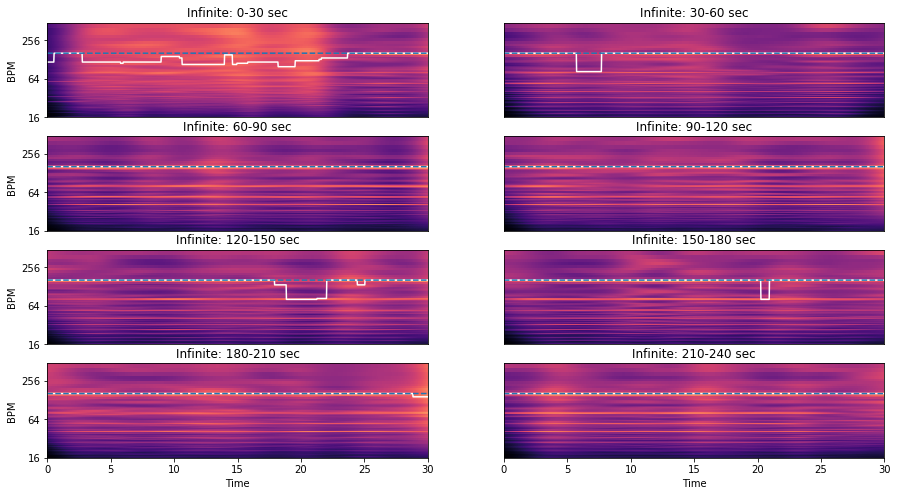

In [4]:
cols = 2
size = int(np.ceil(segments / cols))
fig, axes = plt.subplots(size, cols, figsize=(15, size*2))
name = track.stem.split('-')[-1].replace('_', ' ').title()

for i, ((tempogram, dyn_tempo, tempo), axis) in enumerate(zip(dynamic_tempograms, axes.ravel())):
    lr.display.specshow(tempogram, x_axis='time', y_axis='tempo', ax=axis)
    
    times = lr.frames_to_time(np.arange(len(dyn_tempo)))
    axis.plot(times, dyn_tempo, 'w')
    axis.plot(times, [tempo] * len(times), '--')

    utilty.label_formatter(axis)
    axis.set_title(f'{name}: {30*i}-{30*(i+1)} sec')

In [9]:
tempograms, dynamic_tempos, tempos = zip(*dynamic_tempograms)

In [10]:
tempogram_aggs = [utilty.get_aggregations(tempogram, axis=1) for tempogram in tempograms]
dynamic_tempo_aggs = [utilty.get_aggregations(dyn_tempo) for dyn_tempo in dynamic_tempos]
tempos = [np.asscalar(tempo) for tempo in tempos]

In [14]:
assert len(tempogram_aggs) == len(dynamic_tempo_aggs) == len(tempos) == segments

In [ ]:
from importlib import reload
reload(utilty);